<a href="https://colab.research.google.com/github/ppelino/Projetos_colab/blob/main/Projeto_Compress%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 13: Compressão de imagens  

# Etapa 1: Importação das biblitoecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import pickle
import zipfile
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.13.0'

# Etapa 2: Carregamento da base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/traffic-signs-data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [4]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

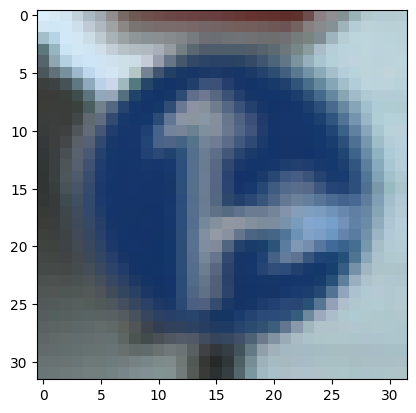

In [6]:
plt.imshow(X_train[1105])

# Etapa 3: Visualização dos dados

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
X_test.shape

(12630, 32, 32, 3)

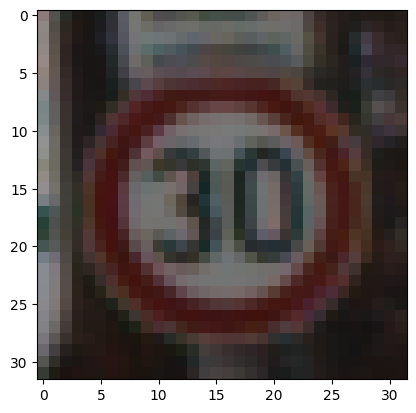

In [9]:
i = random.randint(1,34000)
plt.imshow( X_train[i] , cmap = 'gray')

In [10]:
label = y_train[i]
label

1

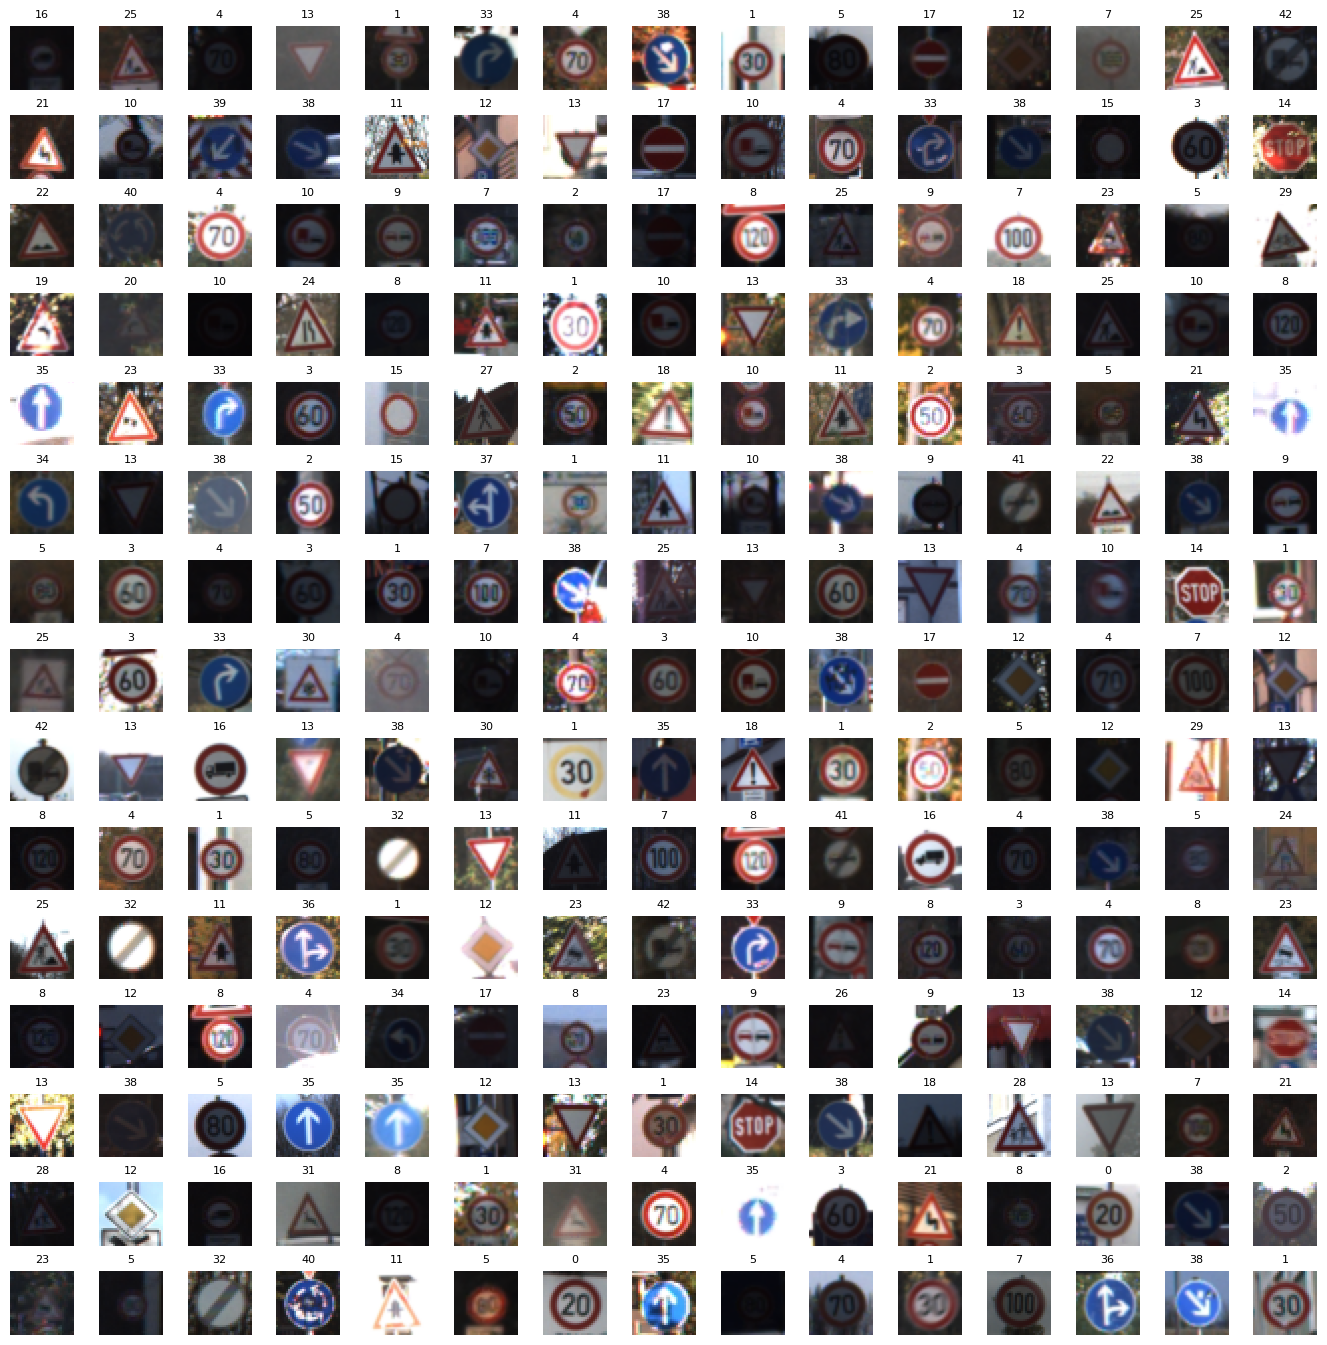

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Etapa 4: Pré-processamento

In [12]:
X_train = X_train / 255
X_test = X_test / 255

# Etapa 5: Criação e treinamento do autoencoder

In [13]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

# Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 average_pooling2d (Average  (None, 16, 16, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        1

In [15]:
autoencoder.fit(X_train,
          X_train,
          epochs=20,
          batch_size=200,
          validation_data=(X_test, X_test))

Epoch 1/20
174/174 [==============================] - 21s 38ms/step - loss: 0.5053 - val_loss: 0.5885
Epoch 2/20
174/174 [==============================] - 4s 25ms/step - loss: 0.4865 - val_loss: 0.5361
Epoch 3/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4828 - val_loss: 0.4919
Epoch 4/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4807 - val_loss: 0.4787
Epoch 5/20
174/174 [==============================] - 4s 25ms/step - loss: 0.4787 - val_loss: 0.4766
Epoch 6/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4776 - val_loss: 0.4748
Epoch 7/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4765 - val_loss: 0.4749
Epoch 8/20
174/174 [==============================] - 4s 25ms/step - loss: 0.4757 - val_loss: 0.4778
Epoch 9/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4751 - val_loss: 0.4742
Epoch 10/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4745 - val_l

# Etapa 6: Avaliação do modelo

In [16]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 397ms/step


In [17]:
predicted.shape

(10, 32, 32, 3)

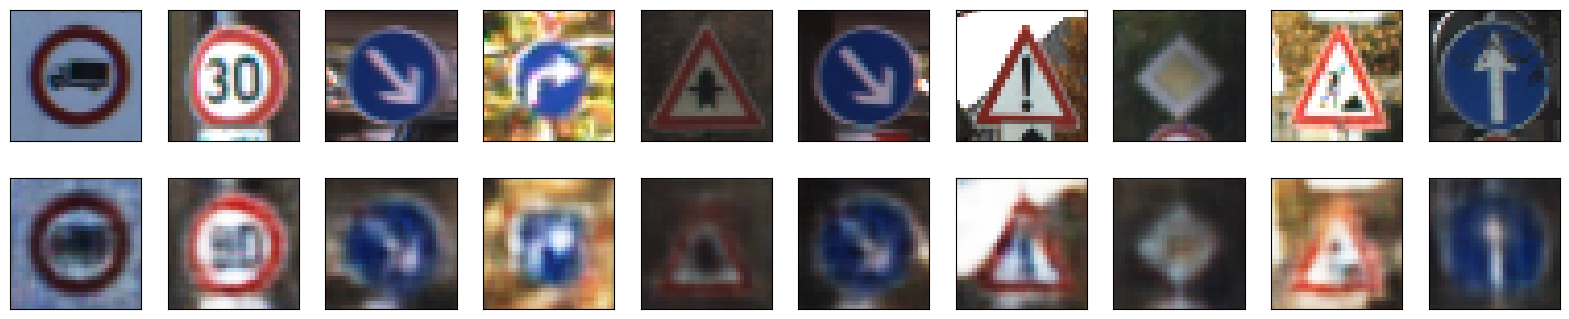

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)